In [1]:
from nilearn.image import new_img_like
from nilearn import image, plotting
import numpy as np
import nibabel as nib
import matplotlib.pyplot as plt
import os
import glob
import ibc_public

%matplotlib inline

/home/sshankar/env/fastsrm/lib/python3.6/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [3]:
shared_resp_dir = '/home/sshankar/raiders/3mm/fastsrm/single_run/'
os.chdir(shared_resp_dir)

In [29]:
# Let's start easy and correlate runs 1 and 11 since they have the same input
r1 = np.load('shared_resp_run1.npy')
r11 = np.load('shared_resp_run11.npy')

# Same with runs 2 and 12
r2 = np.load('shared_resp_run2.npy')
r12 = np.load('shared_resp_run12.npy')

In [26]:
# Correlate corresponding shared responses of runs 1 and 11
r1_11 = np.zeros(20)
for i in range(20):
    r1_11[i] = np.corrcoef(r1[i], r11[i,0:-1])[0,1]

In [27]:
r1_11

array([ 0.25361806,  0.46492881,  0.79120108, -0.22236485,  0.3442662 ,
       -0.1230638 , -0.20140545,  0.09781001,  0.07016341,  0.18131844,
       -0.1177101 ,  0.08263659,  0.1483647 , -0.17812839, -0.22301267,
        0.27904301,  0.02410775,  0.14120034, -0.12449664, -0.03186543])

In [30]:
# Correlate corresponding shared responses of runs 2 and 12
r2_12 = np.zeros(20)
for i in range(20):
    r2_12[i] = np.corrcoef(r2[i], r12[i,0:-17])[0,1]

In [31]:
r2_12

array([ 0.78336826,  0.39349243,  0.02890466, -0.18106742,  0.07852005,
        0.70080459,  0.02846097,  0.11593856,  0.07018546,  0.19769654,
        0.08717182, -0.05293674,  0.18311459,  0.13551763, -0.11893305,
       -0.10458919,  0.0565642 , -0.1270555 , -0.03776946, -0.06385997])

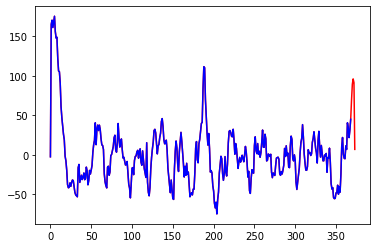

In [48]:
# For run 1, the video ends on TR #369 and acquisition continues on
# for a few more TRs. 
# Plot the shared response until end of video to see if trailing 
# peak is caused by end of video.

# Run #1, Component #1
plt.plot(r1[0], 'r')
plt.plot(r1[0,0:369], 'b')

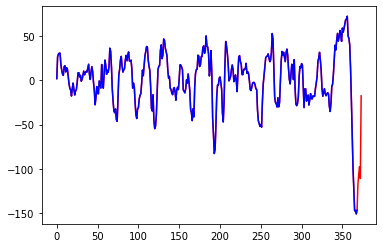

In [44]:
# Run #1, Component #2
plt.plot(r1[1], 'r')
plt.plot(r1[1,0:369], 'b')

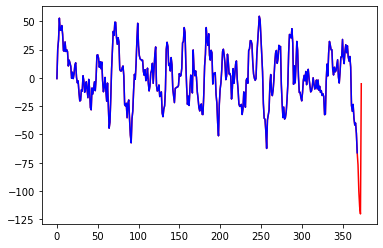

In [45]:
# Run #1, Component #4
plt.plot(r1[3], 'r')
plt.plot(r1[3,0:369], 'b')

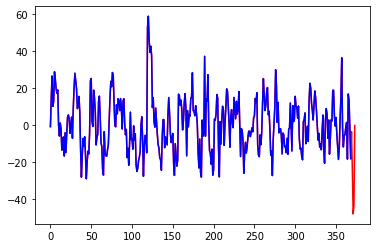

In [50]:
# Run #1, Component #19
plt.plot(r1[18], 'r')
plt.plot(r1[18,0:369], 'b')

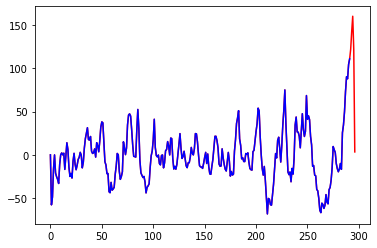

In [51]:
# Run #2, Component #2
plt.plot(r2[1], 'r')
plt.plot(r2[1,0:292], 'b')

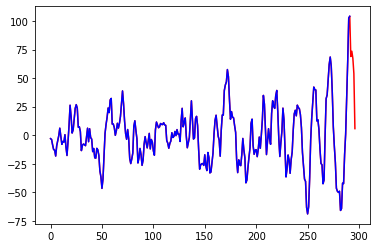

In [52]:
# Run #1, Component #3
plt.plot(r2[2], 'r')
plt.plot(r2[2,0:292], 'b')

In [55]:
# Compare each component of run 1with every component 
# of run 11 to see if there's a better match
best_comp = np.zeros(20)
best_corr = np.zeros(20)

for i in range(20):
    for j in range(20):
        tempcorr = np.corrcoef(r1[i], r11[j,0:-1])[0,1]
        if np.abs(tempcorr) > np.abs(best_corr[i]):
            best_corr[i] = tempcorr
            best_comp[i] = j       

In [62]:
# Print the best-matched component of run 11 for every 
# component of run 1
print('Corrcoeff Component\n')
for i in range(20):
    print(np.round(best_corr[i],2), '\t', np.int(best_comp[i])+1)

Corrcoeff Component

-0.56 	 2
0.58 	 1
0.79 	 3
-0.48 	 7
-0.67 	 4
-0.96 	 5
0.95 	 6
0.52 	 14
0.39 	 15
-0.37 	 16
-0.27 	 20
-0.23 	 20
-0.23 	 12
-0.25 	 8
-0.22 	 15
0.28 	 16
-0.2 	 11
0.19 	 13
0.2 	 17
0.23 	 18


In [63]:
# Compare each component of run 11 with every component 
# of run 1 to see if there's a better match
best_comp = np.zeros(20)
best_corr = np.zeros(20)

for i in range(20):
    for j in range(20):
        tempcorr = np.corrcoef(r11[i,0:-1], r1[j])[0,1]
        if np.abs(tempcorr) > np.abs(best_corr[i]):
            best_corr[i] = tempcorr
            best_comp[i] = j       

# Print the best-matched component of run 11 for every 
# component of run 11
print('Corrcoeff Component\n')
for i in range(20):
    print(np.round(best_corr[i],2), '\t', np.int(best_comp[i])+1)

Corrcoeff Component

0.58 	 2
-0.56 	 1
0.79 	 3
-0.67 	 5
-0.96 	 6
0.95 	 7
-0.48 	 4
-0.4 	 4
-0.28 	 4
0.36 	 8
-0.31 	 8
-0.23 	 13
0.26 	 9
0.52 	 8
0.39 	 9
-0.37 	 10
0.23 	 14
0.23 	 20
-0.19 	 8
-0.27 	 11


In [64]:
# Compare each component of run 2 with every component 
# of run 12 to see if there's a better match
best_comp = np.zeros(20)
best_corr = np.zeros(20)

for i in range(20):
    for j in range(20):
        tempcorr = np.corrcoef(r2[i], r12[j,0:-17])[0,1]
        if np.abs(tempcorr) > np.abs(best_corr[i]):
            best_corr[i] = tempcorr
            best_comp[i] = j       

# Print the best-matched component of run 11 for every 
# component of run 11
print('Corrcoeff Component\n')
for i in range(20):
    print(np.round(best_corr[i],2), '\t', np.int(best_comp[i])+1)

Corrcoeff Component

0.78 	 1
0.39 	 2
-0.29 	 19
-0.21 	 8
-0.49 	 7
0.7 	 6
0.77 	 6
-0.56 	 7
0.59 	 7
-0.41 	 5
0.29 	 3
0.22 	 14
0.25 	 15
-0.24 	 10
0.17 	 9
0.16 	 7
-0.22 	 8
-0.34 	 8
0.17 	 10
-0.21 	 19


In [65]:
# Compare each component of run 2 with every component 
# of run 12 to see if there's a better match
best_comp = np.zeros(20)
best_corr = np.zeros(20)

for i in range(20):
    for j in range(20):
        tempcorr = np.corrcoef(r12[i,0:-17], r2[j])[0,1]
        if np.abs(tempcorr) > np.abs(best_corr[i]):
            best_corr[i] = tempcorr
            best_comp[i] = j       

# Print the best-matched component of run 11 for every 
# component of run 11
print('Corrcoeff Component\n')
for i in range(20):
    print(np.round(best_corr[i],2), '\t', np.int(best_comp[i])+1)

Corrcoeff Component

0.78 	 1
-0.41 	 1
-0.46 	 1
0.3 	 6
-0.56 	 9
0.77 	 7
0.59 	 9
-0.37 	 10
-0.26 	 3
0.25 	 5
-0.14 	 13
0.18 	 7
0.18 	 13
0.22 	 5
0.25 	 13
0.22 	 2
-0.28 	 11
-0.19 	 14
-0.29 	 3
-0.21 	 2
